<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

Parsed with column specification:
cols(
  .default = col_character(),
  Respondent = col_integer(),
  CareerSatisfaction = col_integer(),
  JobSatisfaction = col_integer(),
  HoursPerWeek = col_integer(),
  StackOverflowSatisfaction = col_integer(),
  Salary = col_double(),
  ExpectedSalary = col_double()
)
See spec(...) for full column specifications.


                                   Df    Sum Sq   Mean Sq F value   Pr(>F)    
so_salary$InTheZone                 4 2.783e+11 6.957e+10  45.870  < 2e-16 ***
so_salary$DifficultCommunication    4 2.286e+11 5.715e+10  37.686  < 2e-16 ***
so_salary$OtherPeoplesCode          4 2.183e+11 5.458e+10  35.992  < 2e-16 ***
so_salary$CheckInCode               5 5.579e+10 1.116e+10   7.357 6.84e-07 ***
Residuals                        8660 1.313e+13 1.517e+09                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
4213 observations deleted due to missingness


	Pairwise comparisons using t tests with pooled SD 

data:  sqrt(so_salary$Salary) and so_salary$DifficultCommunication 

                  Agree   Disagree Somewhat agree Strongly agree
Disagree          9.8e-10 -        -              -             
Somewhat agree    0.15328 3.9e-08  -              -             
Strongly agree    1.00000 0.00019  0.17580        -             
Strongly disagree < 2e-16 7.9e-09  < 2e-16        1.2e-08       

P value adjustment method: bonferroni 

,Do you have difficulty communicating your ideas to your peers?,Salary
5,Strongly disagree,65848.17
2,Disagree,58066.49
3,Somewhat agree,51725.16
1,Agree,47563.92
4,Strongly agree,45294.51


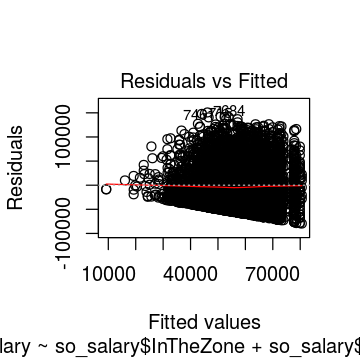

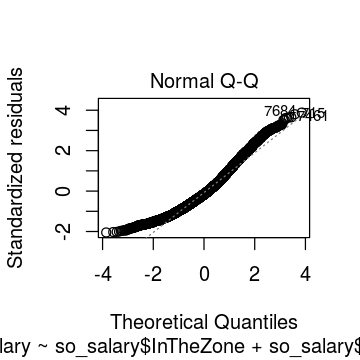

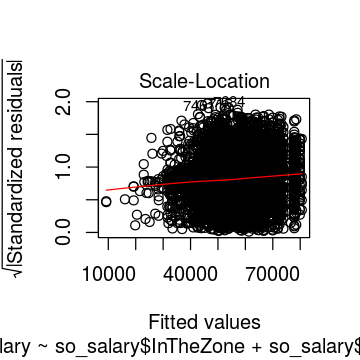

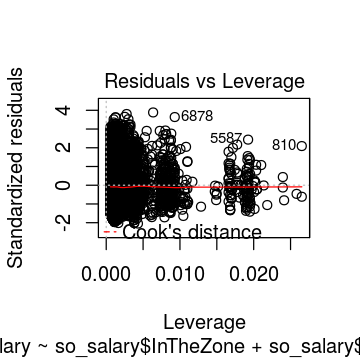

In [2]:
library(lattice)
library(readr)
library(repr)
library(cowplot)
library(ggpubr)
library(dplyr)

# Change plot size to 4 x 3
options(repr.plot.width=3, repr.plot.height=3)

so = read_csv('stack_overflow_2017.csv')

so_salary = so[!is.na(so$Salary),]

salaryDCAnova = aov(so_salary$Salary ~ 
                    so_salary$InTheZone + so_salary$DifficultCommunication + 
                    so_salary$OtherPeoplesCode + so_salary$CheckInCode
                   )

summary(salaryDCAnova)
# Uncomment below line to see the results specifically for the United States
#so_salary = so_us_salary

#pairwise.t.test(so_salary$Salary, so_salary$InTheZone, p.adjust='bonferroni')

#dd = data.frame(aggregate(so_salary[['Salary']], list(so_salary$InTheZone), mean))
#names(dd) = c('Do you often get in the zone while coding?', 'Salary')
# Sort the data frame by descending Salary
#dd[with(dd, order(-Salary)), ]

pairwise.t.test(sqrt(so_salary$Salary), so_salary$DifficultCommunication,  p.adjust='bonferroni')

dd = data.frame(aggregate(so_salary[['Salary']], list(so_salary$DifficultCommunication), mean))
names(dd) = c('Do you have difficulty communicating your ideas to your peers?', 'Salary')
# Sort the data frame by descending Salary
dd[with(dd, order(-Salary)), ]

#pairwise.t.test(so_salary$Salary, so_salary$OtherPeoplesCode,  p.adjust='bonferroni')

#dd = data.frame(aggregate(so_salary[['Salary']], list(so_salary$OtherPeoplesCode), mean))
#names(dd) = c('Maintaining Other People\'s Code is a Form of Torture', 'Salary')
# Sort the data frame by descending Salary
#dd[with(dd, order(-Salary)), ]

#pairwise.t.test(so_salary$Salary, so_salary$CheckInCode, p.adjust='bonferroni')

#dd = data.frame(aggregate(so_salary[['Salary']], list(so_salary$CheckInCode), mean))
#names(dd) = c('How often do you check in code?', 'Salary')
# Sort the data frame by descending Salary
#dd[with(dd, order(-Salary)), ]

plot(salaryDCAnova)